In [7]:
import pandas as pd
import numpy as np
import networkx as nx
import collections as c
import matplotlib.pyplot as plt

%matplotlib inline

In [335]:
df=pd.read_csv('../data/bbAllConvoLinesDFmore.csv',sep=';')

Using this dataset only includes replies to people who are also in the dataset (local and ontopic). This excludes the conversations with celebrities and such — like the 96 replies to a One Direction singer that constitutes the Largest Connected Component of the network if we use the overall bb reply dataset.

In [86]:
len(df)

10373

In [87]:
df.columns.values

array(['Unnamed: 0', 'id', 'username', 'user_id', 'geo_enabled',
       'followCount', 'friendCount', 'faveCount', 'tweetCount', 'date',
       'timing', 'coordinates', 'location', 'source', 'retweetCount',
       'isRetweet', 'contributors', 'hashtags', 'has_media', 'urls',
       'mentions', 'replyWho', 'replyWhat', 'text', 'replyOrigTime',
       'replyOrigText', 'replyOrigReplyWhat', 'replyOrigReplyWho',
       'reply2OrigTime', 'reply2OrigText', 'reply2OrigReplyWhat',
       'reply2OrigReplyWho', 'reply3OrigTime', 'reply3OrigText',
       'reply3OrigReplyWhat', 'reply3OrigReplyWho', 'reply4OrigTime',
       'reply4OrigText', 'reply4OrigReplyWhat', 'reply4OrigReplyWho',
       'reply5OrigTime', 'reply5OrigText', 'reply5OrigReplyWhat',
       'reply5OrigReplyWho', 'reply6OrigTime', 'reply6OrigText',
       'reply6OrigReplyWhat', 'reply6OrigReplyWho', 'reply7OrigTime',
       'reply7OrigText', 'reply7OrigReplyWhat', 'reply7OrigReplyWho',
       'reply8OrigTime', 'reply8OrigText', 're

# Construct reply network of tweets

In [88]:
len(df[df.replyOrigTime!='0'])

10373

In [120]:
tweetEdgeList=df[['replyWhat', 'id']]

In [121]:
tweetEdgeList.to_csv('../data/replyTweetNetOverall.csv',sep=',', header=False, index=False)

In [8]:
G=nx.read_edgelist('../data/replyTweetNetOverall.csv',delimiter=',',create_using=nx.DiGraph(), nodetype=int)

In [123]:
G.number_of_nodes()

16550

In [124]:
G.number_of_edges()

10373

In [125]:
nx.density(G)

3.787342870271366e-05

In [126]:
degrees=nx.degree(G)

In [127]:
np.mean(degrees.values())

1.2535347432024169

In [128]:
max(degrees.values())

10

In [129]:
out_deg=G.out_degree()

In [130]:
max(out_deg.values())

10

In [131]:
out_deg.keys()[out_deg.values().index(10)]

264477309006925826

In [136]:
df[['username','text','replyWho','replyOrigText']][df.replyWhat==264477309006925826]

,username,text,replyWho,replyOrigText
4849,ThomasSickler,@NYCMayorsOffice THANK YOU! THANK GOD ITS CANC...,NYCMayorsOffice,We have decided to cancel the NYC marathon. Th...
4851,LonerganM,@NYCMayorsOffice Thank you. New York thanks you.,NYCMayorsOffice,We have decided to cancel the NYC marathon. Th...
4853,tfernandes113,Good job! RT @NYCMayorsOffice: We have decided...,NYCMayorsOffice,We have decided to cancel the NYC marathon. Th...
4860,NorEasterNJ,@NYCMayorsOffice Good move Mikey,NYCMayorsOffice,We have decided to cancel the NYC marathon. Th...
4863,LizTowler,@NYCMayorsOffice thanks for making the right d...,NYCMayorsOffice,We have decided to cancel the NYC marathon. Th...
4869,FlemingPhD,@NYCMayorsOffice : Thank God. Good decision. ...,NYCMayorsOffice,We have decided to cancel the NYC marathon. Th...
4873,emburkh,@NYCMayorsOffice @NYCService maybe the runners...,NYCMayorsOffice,We have decided to cancel the NYC marathon. Th...
4874,CG_DarkAngel,@NYCMayorsOffice @MikeBloomberg Thank you for ...,NYCMayorsOffice,We have decided to cancel the NYC marathon. Th...
4910,Cowwgurl,@NYCMayorsOffice It's the right decision! Than...,NYCMayorsOffice,We have decided to cancel the NYC marathon. Th...
5049,PaulyFook,@NYCMayorsOffice Waiting for the Mayor to take...,NYCMayorsOffice,We have decided to cancel the NYC marathon. Th...


So the local tweet most replied to was NYCMayorsOffice cancelling the marathon!!!

# Annotate tweet network with usernames and text

In [11]:
userNameDict=dict(zip(df.id.values, df.username.values))

In [12]:
textDict=dict(zip(df.id.values, df.text.values))

In [74]:
dateDict=dict(zip(df.id.values, df.date.values))

In [13]:
nx.set_node_attributes(G,'username',userNameDict)

In [14]:
nx.set_node_attributes(G,'text',textDict)

In [75]:
nx.set_node_attributes(G,'date',dateDict)

In [76]:
comps=list(nx.weakly_connected_component_subgraphs(G))

In [77]:
gcc=sorted(comps, key = len, reverse=True)

In [17]:
g0=gcc[0]

In [18]:
len(g0)

44

In [145]:
g0.number_of_edges()

43

In [149]:
nx.diameter(nx.Graph(g0))

43

In [193]:
max(g0.out_degree().values())

1

So, as we know, there is no branching here - each next tweet responds to the last. This means at most out-degree of 1

In [150]:
len(comps)

6177

This is the number of conversations

In [19]:
g1=gcc[1]

In [157]:
len(g1)

43

In [158]:
g1.number_of_edges()

42

In [159]:
nx.diameter(nx.Graph(g1))

42

In [194]:
max(g1.out_degree().values())

1

In [20]:
g2=gcc[2]

In [161]:
len(g2)

41

In [189]:
df[df.lenRepSet==43]

,Unnamed: 0,id,username,user_id,geo_enabled,followCount,friendCount,faveCount,tweetCount,date,...,reply43OrigText,reply43OrigReplyWhat,reply43OrigReplyWho,dateObj,repSecDiff,repSet,lenRepSet,convNames,convStart,branchConvo
2235,154239,262254450029244417,Megglezzz,74255540,True,232,743,17,4292,2012-10-27 18:08:27,...,0,0,0,2012-10-27 18:08:27,576,"set([262252030679216128, 262254450029244417, 2...",43,"set(['DDougyy', 'Megglezzz'])",261901117695332352,0
10066,604623,274009161975619584,Megglezzz,74255540,True,232,743,17,4292,2012-11-29 04:37:29,...,0,0,0,2012-11-29 04:37:29,1251,"set([274009161975619584, 274003914045661185, 2...",43,"set(['DDougyy', 'Megglezzz'])",273878290891157505,0


In [176]:
compSizes=[]
maxOutDeg=[]
for g in comps:
    compSizes.append(len(g))
    maxOutDeg.append(max(g.out_degree().values()))

(array([  4.26700000e+03,   1.04500000e+03,   4.00000000e+02,
          2.08000000e+02,   9.50000000e+01,   6.80000000e+01,
          2.90000000e+01,   2.30000000e+01,   9.00000000e+00,
          7.00000000e+00,   6.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   2.00000000e+00]),
 array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,  20., 

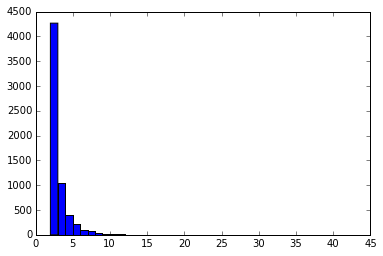

In [201]:
plt.hist(compSizes,42)

In [1]:
freq=c.Counter(compSizes)
y=freq.values()
x=freq.keys()
logx=np.log(x)
logy=np.log(y)
coeffs=np.polyfit(logx,logy,deg=1)
poly=np.poly1d(coeffs)
a=np.exp(coeffs[1])
b=coeffs[0]
eq='y='+str(round(a,2))+'*x^('+str(round(b,2))+')'

plt.figure()
plt.loglog(x,y,'co') 
plt.xlabel('Number of tweets in the conversation')
plt.ylabel('Frequency')
plt.title('Loglog plot of conversation sizes (steps)')
plt.xlim(xmin=-0,xmax=45)
plt.ylim(ymin=0,ymax=10**3.7)
yfit = lambda x: np.exp(poly(np.log(x)))
plt.loglog(x,yfit(x),linewidth=2,c='r',label=eq)
plt.legend(loc="upper right")

NameError: name 'c' is not defined

In [212]:
sum(d>1 for d in maxOutDeg)

368

Check why the numbers from network (6177 convos, 368 branch) differ slightly from df (6175 convos, 369 branch)

In [143]:
branchConvoStarts=df.convStart[df.branchConvo>0].unique().tolist()

In [225]:
for g in comps:
    for s in branchConvoStarts:
        if s in g:
            branchConvoStarts=branchConvoStarts.remove(s)

In [235]:
branchConvoStarts[0] in G

False

In [257]:
df[['id','text','replyWhat','replyOrigText','replyOrigReplyWhat','reply2OrigText','reply2OrigReplyWhat','reply3OrigText','reply3OrigReplyWhat','reply4OrigText']].loc[346]

id                                                    257898385686794240
text                   @JohnnycBlaze no where?  I'm confused I have n...
replyWhat                                             257892840766590976
replyOrigText                     @El_Hindu226 saw my spidey framed pic?
replyOrigReplyWhat                                    257888498995052544
reply2OrigText           @JohnnycBlaze for what? Did u attach something?
reply2OrigReplyWhat                                   257885425685901312
reply3OrigText                   @El_Hindu226 thankx for this by the way
reply3OrigReplyWhat                                   255499297834008576
reply4OrigText                                                         0
Name: 346, dtype: object

**So we don't have the original in our data set**, we have the tweets starting from 1312, which points to the original (but not more info)

In [262]:
df[df.replyWhat==257885425685901312]

,Unnamed: 0,id,username,user_id,geo_enabled,followCount,friendCount,faveCount,tweetCount,date,...,reply43OrigText,reply43OrigReplyWhat,reply43OrigReplyWho,dateObj,repSecDiff,repSet,lenRepSet,convNames,convStart,branchConvo
335,22640,257888498995052544,El_Hindu226,201824165,True,28,222,1,392,2012-10-15 16:59:44,...,0,0,0,2012-10-15 16:59:44,733,"set([257888498995052544, 257885425685901312, 2...",3,"set(['JohnnycBlaze', 'El_Hindu226'])",255499297834008576,1


# Build Full conversation DF based on components

In [79]:
compList=[]
for c in comps:
    compList.append(nx.topological_sort(c))

Tweet 0 is the original, which starts the conversation

In [323]:
cols=[]
for i in xrange(44):
    cols.append('tweet'+str(i))

In [324]:
convs=pd.DataFrame(compList, dtype='object', columns=cols)

In [325]:
convs=convs.fillna(0)

In [326]:
newColOrder=[]
for i in xrange(44):
    dateCol='date'+str(i)
    convs[dateCol]=0
    userCol='username'+str(i)
    convs[userCol]=0
    textCol='text'+str(i)
    convs[textCol]=0
    tweetCol='tweet'+str(i)
    newColOrder.append(tweetCol)
    newColOrder.append(dateCol)
    newColOrder.append(userCol)
    newColOrder.append(textCol)

reorder the columns to have info about each tweet together

In [327]:
convs=convs[newColOrder]

fill in all the values

In [328]:
convs['branching']=convs.tweet0.isin(branchConvoStarts)

In [162]:
branchConvosNotInComps=list(set(branchConvoStarts) - set(convs.tweet0.tolist()))

In [164]:
branchConvosNotInComps[0] in G

False

So this particular original tweet, while in DF is not in the graph! What's going on?

In [171]:
df[['id','username','text', 'date','replyWho', 'replyWhat', 'replyOrigTime',
       'replyOrigText', 'replyOrigReplyWhat', 'replyOrigReplyWho',
       'reply2OrigTime', 'reply2OrigText', 'reply2OrigReplyWhat','convStart']][df.convStart==branchConvosNotInComps[0]]

,id,username,text,date,replyWho,replyWhat,replyOrigTime,replyOrigText,replyOrigReplyWhat,replyOrigReplyWho,reply2OrigTime,reply2OrigText,reply2OrigReplyWhat,convStart
5464,265138772717477889,sabrinaroseee,@Sara_Persiano @shannondicksonn how do you kno...,2012-11-04 17:09:44,Sara_Persiano,265136910593318912,2012-11-04 17:02:20,@shannondicksonn not until the 12th,265136439702978560,shannondicksonn,0,0,0,265136439702978560
5465,265138981430243328,Sara_Persiano,@sabrinaroseee @shannondicksonn my brothers fr...,2012-11-04 17:10:33,sabrinaroseee,265138772717477889,2012-11-04 17:09:44,@Sara_Persiano @shannondicksonn how do you kno...,265136910593318912,Sara_Persiano,2012-11-04 17:02:20,@shannondicksonn not until the 12th,265136439702978560,265136439702978560
5466,265139021531975680,Sara_Persiano,@sabrinaroseee @shannondicksonn buses theb we ...,2012-11-04 17:10:43,sabrinaroseee,265138772717477889,2012-11-04 17:09:44,@Sara_Persiano @shannondicksonn how do you kno...,265136910593318912,Sara_Persiano,2012-11-04 17:02:20,@shannondicksonn not until the 12th,265136439702978560,265136439702978560
5469,265139154902462465,sabrinaroseee,@Sara_Persiano @shannondicksonn YAY,2012-11-04 17:11:15,Sara_Persiano,265138981430243328,2012-11-04 17:10:33,@sabrinaroseee @shannondicksonn my brothers fr...,265138772717477889,sabrinaroseee,2012-11-04 17:09:44,@Sara_Persiano @shannondicksonn how do you kno...,265136910593318912,265136439702978560


So we don't have the original tweet that started this convo in our data set. What about the second one: 265136910593318912?

In [172]:
265136910593318912 in G

True

So we are missing some original tweets from the network b/c we have a mention of them (as a scond order reply to in df), but don't actually have them in the file - so miss them in the way we construct the network. And **that's ok for the convo nets**, since we don't have their text!!!

# Determine branching by degree, not df

In [329]:
convs['branching']=[i>1 for i in maxOutDeg]

In [330]:
convs['convSize']=compSizes

Fill in the original tweet info. This is tricky b/c we only have these as ReplyWhat, so multiple rows in df correspond to a single tweet0. Sadly, have to do this in a loop (just this once).

In [347]:
for index, row in convs.iterrows():
    #convs.loc[index,'text0']=df.replyOrigText[df.replyWhat==int(row['tweet0'])].drop_duplicates().values[0]
    convs.loc[index,'date0']=df.replyOrigTime[df.replyWhat==int(row['tweet0'])].drop_duplicates().values[0]
    convs.loc[index,'username0']=df.replyWho[df.replyWhat==int(row['tweet0'])].drop_duplicates().values[0]

Fill in all the other cells

In [379]:
for i in range(1,44):
    textCol='text'+str(i)
    dateCol='date'+str(i)
    usernameCol='username'+str(i)
    tweetCol='tweet'+str(i)
    temp=pd.merge(left=convs, right=df[['id','username','date','text']],how='left', left_on=tweetCol, right_on='id')
    convs[[textCol,dateCol,usernameCol]]=temp[['text','date','username']]

In [392]:
convs=convs.fillna(0)

In [459]:
def ReplyNameSet(row):
    chain=set()
    for i in xrange(44):
        colName='username'+str(i)
        if str(row[colName])!='0':
            chain=chain | set([row[colName]])
    return list(chain)

In [460]:
convs['allNames']=convs.apply(ReplyNameSet, axis=1)

In [397]:
def convoEndTime(row):
    #chain=set([row.id, row.replyWhat, row.replyOrigReplyWhat])
    i=43
    colName='tweet'+str(i)
    while row[colName]==0:
        i-=1
        colName='tweet'+str(i)
    return row['date'+str(i)]

In [410]:
convs['convoEndTime']=convs.apply(convoEndTime, axis=1)

In [461]:
convs.to_csv('../data/bbAllFullConvos.csv',sep=';', index=False)